In [ ]:
#https://github.com/WillKoehrsen/Data-Analysis/blob/master/random_forest_explained/Random%20Forest%20Explained.ipynb

In [50]:
# Pandas is used for data manipulation, numpy for numerical operations, arrays
import pandas as pd
import numpy as np

In [51]:
# Read in data and display first 5 rows
df = pd.read_csv('./Datasets/tempratures.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [52]:
# Shape of Dataset
print('The shape of our dataset is:', df.shape)

The shape of our dataset is: (348, 12)


In [53]:
# Summary of dataset
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [54]:
# Mean and median are nearly similar thus not much data anomaly

In [39]:
df=df.loc[:,['year','month','day','temp_2','temp_1','average','actual','friend']]

In [55]:
# Creating dates from Year-Month-Date

# Using datetime for dealing with dates
import datetime

# Get years, months, and days
years = df['year']
months = df['month']
days = df['day']

In [56]:
# Creating date as List and then converting to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]

In [57]:
# Importing matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5,1,'Max Temp')

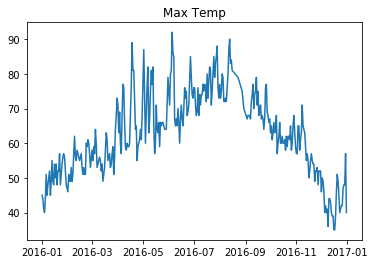

In [58]:
# Actual max temperature measurement
plt.plot(dates, df['actual'])
plt.title('Max Temp')
#set_xlabel(''); set_ylabel('Temperature'); set_title('Max Temp')

Text(0.5,1,'Previous Max Temp')

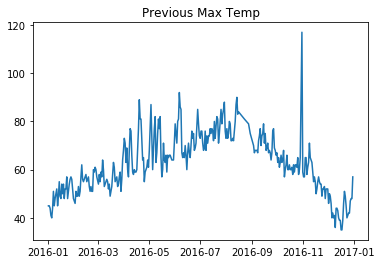

In [59]:
# Temperature from 1 day ago
plt.plot(dates, df['temp_1'])
plt.title('Previous Max Temp')

Text(0.5,1,'Two Days Prior Max Temp')

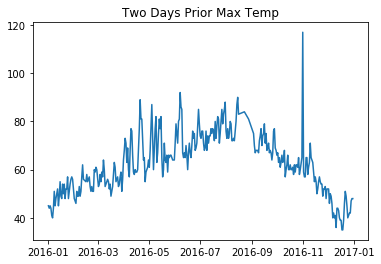

In [60]:
# Temperature from 2 days ago
plt.plot(dates, df['temp_2'])
plt.title('Two Days Prior Max Temp')

Text(0.5,1,'Friend Estimate')

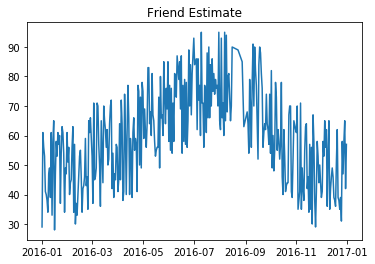

In [61]:
# Friend Estimate
plt.plot(dates, df['friend'])
plt.title('Friend Estimate')

In [62]:
# One hot encoding
df = pd.get_dummies(df)
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [65]:
df=df.drop(['forecast_noaa', 'forecast_acc', 'forecast_under'], axis=1)

In [66]:
# Checking the shape
print('Shape of dataset after one-hot encoding:', df.shape)

Shape of dataset after one-hot encoding: (348, 15)


In [67]:
# Labels are the values we want to predict
labels = np.array(df['actual'])

In [68]:
# Remove the labels from the features
# axis 1 refers to the columns
df= df.drop('actual', axis = 1)

In [69]:
# Saving feature names for later use
feature_list = list(df.columns)

In [70]:
# Convert to numpy array
df = np.array(df)

#### Test and Train Split

In [71]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df, train_labels, test_labels = train_test_split(df, labels, test_size = 0.25,
                                                                           random_state = 0)

In [72]:
print('Training Features Shape:', train_df.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_df.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (261, 14)
Training Labels Shape: (261,)
Testing Features Shape: (87, 14)
Testing Labels Shape: (87,)


### Baseline

In [73]:
# The baseline predictions are the historical averages
baseline_preds = test_df[:, feature_list.index('average')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2), 'degrees.')

Average baseline error:  4.54 degrees.


### Training Model

In [74]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=0)

# Train the model on training data
rf.fit(train_df, train_labels);

In [76]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_df)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.79 degrees.


In [77]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 93.91 %.


In [78]:
rf_new = RandomForestRegressor(n_estimators = 100, criterion = 'mse', max_depth = None, 
                               min_samples_split = 2, min_samples_leaf = 1)

In [79]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.52
Variable: average              Importance: 0.39
Variable: day                  Importance: 0.02
Variable: temp_2               Importance: 0.02
Variable: friend               Importance: 0.02
Variable: month                Importance: 0.01
Variable: week_Mon             Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0


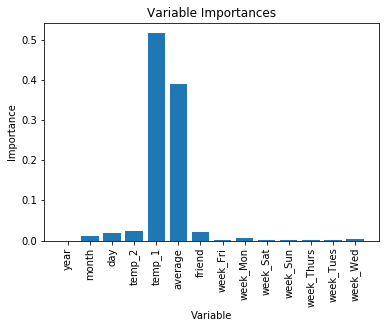

In [80]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### Model with top 2 features

In [81]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Extract the two most important features
important_indices = [feature_list.index('temp_1'), feature_list.index('average')]
train_important = train_df[:, important_indices]
test_important = test_df[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, train_labels)

# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)

errors = abs(predictions - test_labels)

# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape

print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.99 degrees.
Accuracy: 93.59 %.


In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse=mean_squared_error(predictions, test_labels)
print('Mean Squared Error:', round(np.mean(mse), 2), 'degrees.')
rmse = sqrt(mean_squared_error(predictions, test_labels))
print('Root Mean Squared Error:', round(np.mean(rmse), 2), 'degrees.')
#The lower the MSE the better.

Mean Squared Error: 26.51 degrees.
Root Mean Squared Error: 5.15 degrees.


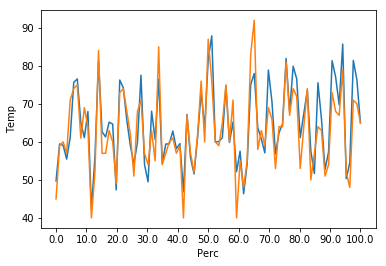

In [96]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np

# Percentile values
p = np.array([0.0, 10.0, 20.0, 30.0,40.0,50.0,60.0,70.0,80.0,90.0, 100.0])

perc = mlab.prctile(predictions, p=p)
#perc = mlab.prctile(test_labels, p=p)

plt.xlabel('Perc')
plt.ylabel('Temp')

plt.plot(predictions)
plt.plot(test_labels)
# Place red dots on the percentiles
#plt.plot((len(predictions)-1) * p/100., perc, 'ro')

# Set tick locations and labels
plt.xticks((len(predictions)-1) * p/100., map(str, p))

plt.show()

In [ ]:
# Squared Error
print("MSE = %s" % metrics.meanSquaredError)
print("RMSE = %s" % metrics.rootMeanSquaredError)

# R-squared
print("R-squared = %s" % metrics.r2)

# Mean absolute error
print("MAE = %s" % metrics.meanAbsoluteError)

# Explained variance
print("Explained variance = %s" % metrics.explainedVariance)

In [ ]:
# Plotting the ROC curve
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score